<a href="https://colab.research.google.com/github/User-2rxeg/NYC-CrashLens/blob/main/V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load crashes dataset
crashes_url = 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD'
df_crashes = pd.read_csv(crashes_url, low_memory=False)



# Quick preview
df_crashes.head()


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [4]:
# Load persons dataset
persons_url = 'https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=download'
df_persons = pd.read_csv(persons_url, low_memory=False)

df_persons.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [5]:
print("Crashes Dataset Structure:")
df_crashes.info()
df_crashes.shape

print("\nPersons Dataset Structure:")
df_persons.info()
df_persons.shape


Crashes Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218398 entries, 0 to 2218397
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST 

(5812966, 21)

In [6]:
# Count missing values in each dataset
print("Missing values in Crashes dataset:")
print(df_crashes.isna().sum().sort_values(ascending=False).head(15))

print("\nMissing values in Persons dataset:")
print(df_persons.isna().sum().sort_values(ascending=False).head(15))


Missing values in Crashes dataset:
VEHICLE TYPE CODE 5              2208678
CONTRIBUTING FACTOR VEHICLE 5    2208362
VEHICLE TYPE CODE 4              2183085
CONTRIBUTING FACTOR VEHICLE 4    2181757
VEHICLE TYPE CODE 3              2064123
CONTRIBUTING FACTOR VEHICLE 3    2057898
OFF STREET NAME                  1827765
CROSS STREET NAME                 847613
ZIP CODE                          680139
BOROUGH                           679864
ON STREET NAME                    483007
VEHICLE TYPE CODE 2               444675
CONTRIBUTING FACTOR VEHICLE 2     355929
LOCATION                          240338
LATITUDE                          240338
dtype: int64

Missing values in Persons dataset:
CONTRIBUTING_FACTOR_2    5712422
CONTRIBUTING_FACTOR_1    5712290
PED_ACTION               5711011
PED_LOCATION             5710910
SAFETY_EQUIPMENT         3026590
EJECTION                 2824291
POSITION_IN_VEHICLE      2823834
EMOTIONAL_STATUS         2727576
BODILY_INJURY            2727533
COMP

In [11]:
df_persons.describe()


,UNIQUE_ID,COLLISION_ID,VEHICLE_ID,PERSON_AGE
count,5.812966e+06,5.812966e+06,5.571992e+06,5.164032e+06
mean,9.369712e+06,4.015232e+06,1.870102e+07,3.751272e+01
std,2.759923e+06,6.646439e+05,1.620162e+06,1.111289e+02
min,1.092200e+04,3.700000e+01,1.234230e+05,-9.990000e+02
25%,7.096844e+06,3.705000e+06,1.759941e+07,2.400000e+01
50%,9.569374e+06,4.059562e+06,1.880503e+07,3.600000e+01
75%,1.187840e+07,4.437507e+06,2.001448e+07,5.100000e+01
max,1.352586e+07,4.855214e+06,2.096477e+07,9.999000e+03


In [10]:
df_crashes.describe()


,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.978060e+06,1.978060e+06,2.218380e+06,2.218367e+06,2.218398e+06,2.218398e+06,2.218398e+06,2.218398e+06,2.218398e+06,2.218398e+06,2.218398e+06
mean,4.059090e+01,-7.368519e+01,3.280317e-01,1.585400e-03,5.955018e-02,7.838990e-04,2.915347e-02,1.262172e-04,2.346959e-01,6.455109e-04,3.264281e+06
std,2.324645e+00,4.321829e+00,7.148366e-01,4.206556e-02,2.499651e-01,2.862424e-02,1.705068e-01,1.127399e-02,6.759909e-01,2.778873e-02,1.509494e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066734e+01,-7.397453e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.190720e+06
50%,4.072032e+01,-7.392676e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.745490e+06
75%,4.076956e+01,-7.386658e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.300305e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.855214e+06


In [8]:
duplicates_crashes = df_crashes.duplicated(subset=["COLLISION_ID"]).sum()
duplicates_persons = df_persons.duplicated(subset=["COLLISION_ID"]).sum()

print("Duplicate collision IDs in crashes:", duplicates_crashes)
print("Duplicate collision IDs in persons:", duplicates_persons)


Duplicate collision IDs in crashes: 0
Duplicate collision IDs in persons: 4224569


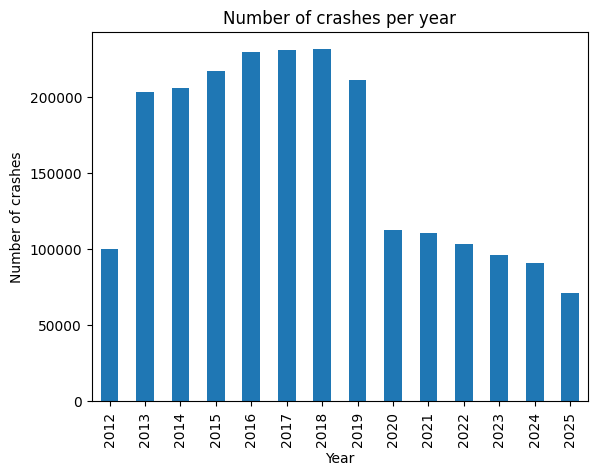

In [16]:
import matplotlib.pyplot as plt

df_crashes['YEAR'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of crashes per year")
plt.xlabel("Year")
plt.ylabel("Number of crashes")
plt.show()


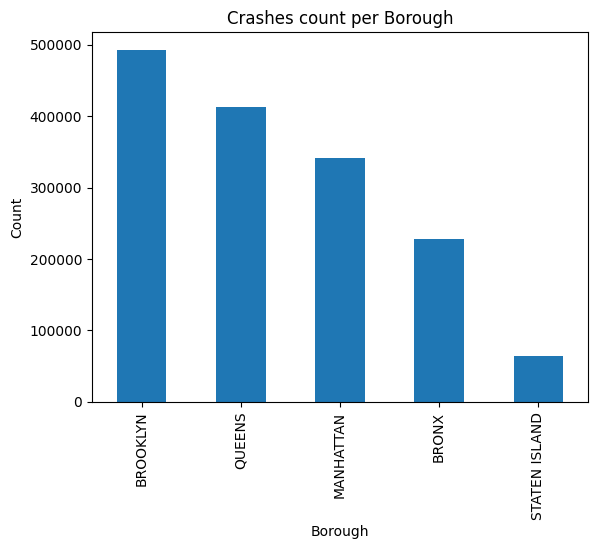

In [17]:
df_crashes['BOROUGH'].value_counts().plot(kind='bar')
plt.title("Crashes count per Borough")
plt.xlabel("Borough")
plt.ylabel("Count")
plt.show()


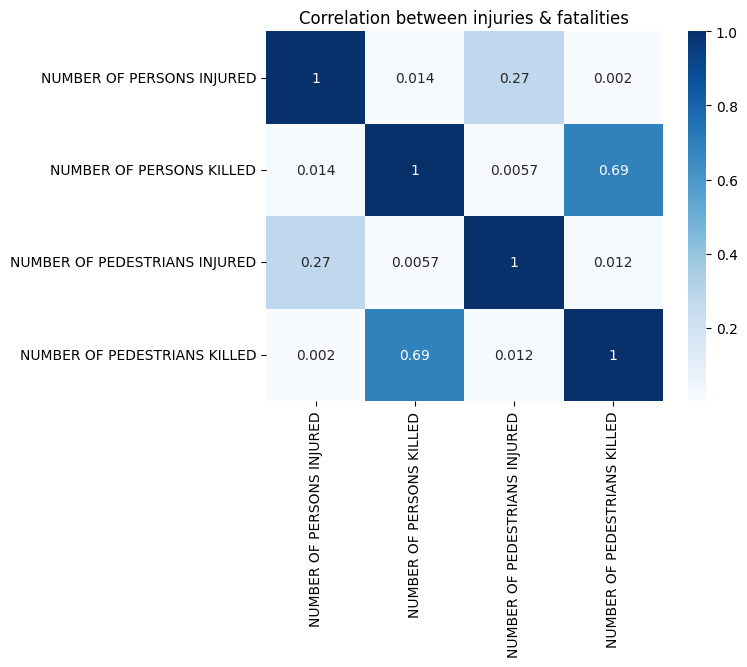

In [19]:
import seaborn as sns

sns.heatmap(df_crashes[['NUMBER OF PERSONS INJURED',
                        'NUMBER OF PERSONS KILLED',
                        'NUMBER OF PEDESTRIANS INJURED',
                        'NUMBER OF PEDESTRIANS KILLED']].corr(),
            annot=True, cmap='Blues')
plt.title("Correlation between injuries & fatalities")
plt.show()


In [20]:
#  Standardize formats Date:
df_crashes['CRASH DATE'] = pd.to_datetime(df_crashes['CRASH DATE'], errors='coerce')
df_crashes['YEAR'] = df_crashes['CRASH DATE'].dt.year


In [25]:
print(" Crashes dataset — Before removing duplicates:", len(df_crashes))

df_crashes = df_crashes.drop_duplicates(subset=["COLLISION_ID"])

print(" Crashes dataset — After removing duplicates:", len(df_crashes))


 Crashes dataset — Before removing duplicates: 2218398
 Crashes dataset — After removing duplicates: 2218398


In [24]:
print("Persons dataset — before removing duplicates:", len(df_persons))
df_persons = df_persons.drop_duplicates(subset=["COLLISION_ID"])
print("Persons dataset — after removing duplicates:", len(df_persons))

Persons dataset — before removing duplicates: 5812966
Persons dataset — after removing duplicates: 1588397
